In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

# Exponential Smoothening
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import Holt
# Autocorrelation
from statsmodels.stats.stattools import durbin_watson

# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Model Building
## Auto Regression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [88]:
raw_data = pd.read_csv("TFdata.csv")
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-08-02,5.36,5.53,5.36,5.49,4.08,212976.0
1,13-08-02,5.5,5.59,5.38,5.42,4.03,153576.0
2,14-08-02,5.43,5.43,4.94,5.04,3.75,822776.0
3,15-08-02,5.04,5.04,5.04,5.04,3.75,0.0
4,16-08-02,5.02,5.26,4.94,5.03,3.74,811856.0


In [89]:
# chosen variable to forecast
data = pd.DataFrame({'Date':raw_data["Date"], "Close":  raw_data["Close"]})
data

,Date,Close
0,12-08-02,5.49
1,13-08-02,5.42
2,14-08-02,5.04
3,15-08-02,5.04
4,16-08-02,5.03
5,19-08-02,4.91
6,20-08-02,5.04
7,21-08-02,5.29
8,22-08-02,5.52
9,23-08-02,5.85


### DATA PREPROCESSING

In [91]:
#removing punctuations and fixing blank values with nan in forecast column

data['Close'] = (data['Close']).astype("str")

punctuation = ["$",",","-","/"]
for i in punctuation:
    data['Close'] = data['Close'].str.replace(i, '', regex=True) 
         
         
data['Close'] = pd.to_numeric(data['Close'],errors="coerce")  

In [92]:
# check for null
data['Close'].isna().sum()

16

In [93]:
#Filling missing values
data['Close']= data['Close'].interpolate(option="linear")

#Filling the data using linear interpolation which is similar to forward backward filling.

In [94]:
#check for null value again after filling missing
data['Close'].isna().sum()

0

In [95]:
data.head(30)

,Date,Close
0,12-08-02,5.49
1,13-08-02,5.42
2,14-08-02,5.04
3,15-08-02,5.04
4,16-08-02,5.03
5,19-08-02,4.91
6,20-08-02,5.04
7,21-08-02,5.29
8,22-08-02,5.52
9,23-08-02,5.85


<AxesSubplot:xlabel='Close'>

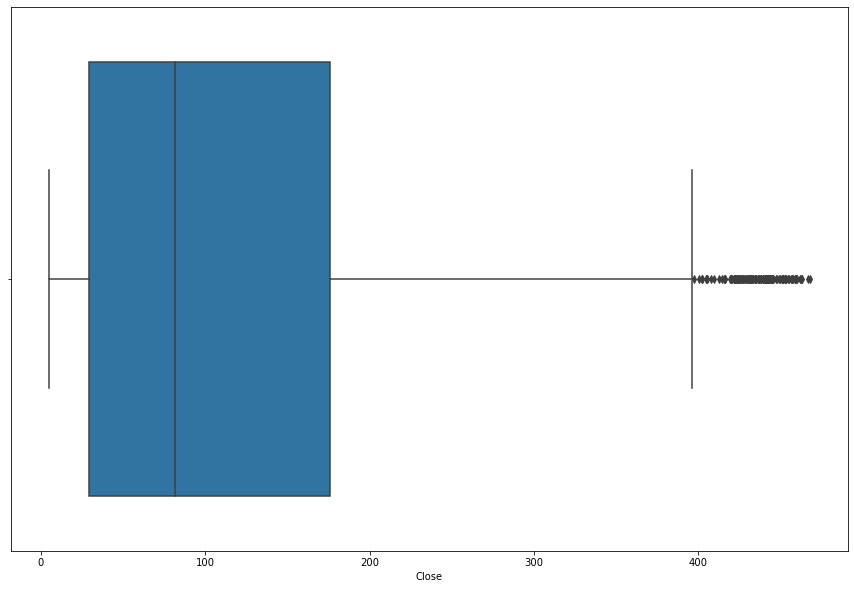

In [96]:
#outlier detection
sns.boxplot(data["Close"])

# the data seem to have some influential outliers as we know in stock prices there could be extreme fluctuations at times
# so we will not be treating it

In [97]:
#pd.set_option('display.max_rows', None)

In [98]:
# splitting train test based on financial year

In [99]:
train = data.iloc[:4599]
test = data.iloc[4599:4722]

In [195]:
len(test)

123

In [100]:
train
# 12-08-2002 to 29-01-2021

,Date,Close
0,12-08-02,5.490000
1,13-08-02,5.420000
2,14-08-02,5.040000
3,15-08-02,5.040000
4,16-08-02,5.030000
5,19-08-02,4.910000
6,20-08-02,5.040000
7,21-08-02,5.290000
8,22-08-02,5.520000
9,23-08-02,5.850000


In [101]:
test

,Date,Close
4599,01-02-21,434.21
4600,02-02-21,443.08
4601,03-02-21,442.61
4602,04-02-21,441.00
4603,05-02-21,436.78
4604,08-02-21,444.55
4605,09-02-21,439.41
4606,10-02-21,444.44
4607,11-02-21,443.43
4608,12-02-21,441.33


In [80]:
# test data - 01/04/2020 to 30/07/2021

# predicting for last six months of the dataset

# neglecting the extra three days after the test

In [81]:
### visualizing the patterns in data

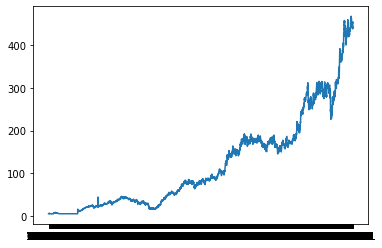

In [82]:
#plot graph
plt.plot(data["Close"], linestyle = 'solid')
plt.show()

In [ ]:
# we could see clear trend in the data but no seasonality.

In [107]:
data.set_index("Date",drop=True,inplace=True)

## Drift method (Baseline model)

In [109]:
## This method usually tells the amount of average chabge over time

In [117]:
drift_values=[]
yt=train.values[-1][1]
y1=train.values[0][1]
t=len(train)-1

for h in range(1,len(test)+1):
    drift_values.append(yt+(h*(yt-y1)/(t-1)))

In [118]:
y_hat_drift=test.copy()
y_hat_drift["Drift method"]=drift_values

In [119]:
y_hat_drift

,Date,Close,Drift method
4599,01-02-21,434.21,430.432419
4600,02-02-21,443.08,430.524838
4601,03-02-21,442.61,430.617257
4602,04-02-21,441.00,430.709676
4603,05-02-21,436.78,430.802095
4604,08-02-21,444.55,430.894514
4605,09-02-21,439.41,430.986933
4606,10-02-21,444.44,431.079352
4607,11-02-21,443.43,431.171771
4608,12-02-21,441.33,431.264190


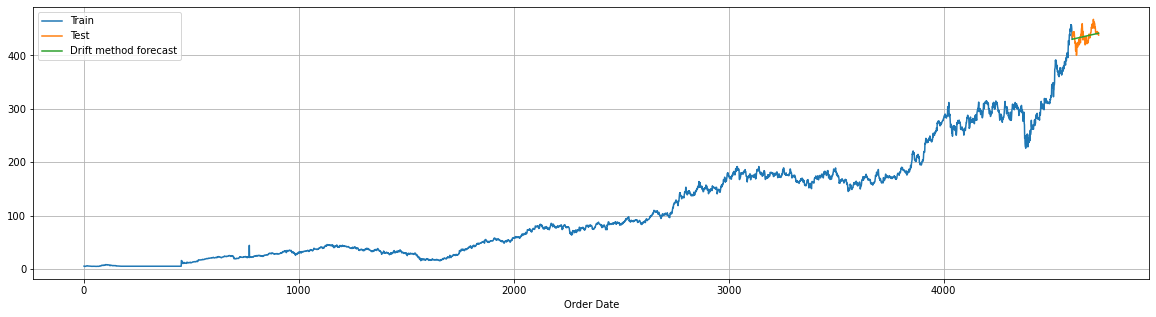

In [123]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_drift["Drift method"], label='Drift method forecast')
plt.xlabel('Order Date')
plt.legend(loc='best')
plt.show()

In [141]:
#Test performance
mape=(mean_absolute_percentage_error(test['Close'],y_hat_drift["Drift method"])*100).round(2)
result = ({'Drift method forecasting on Test data','MAPE %': mape})
result

{'Method': 'Drift method forecasting on Test data', 'MAPE %': 2.23}

### EXPONENTIAL METHOD

*  We will choose Double Exponential Smoothing (DES) / Holt's Linear Model because the data shows only a clear trend

In [129]:
y_DES     = train.copy()
y_hat_DES = test.copy()

In [133]:
# Optimizing the model to find the best smoothing parameters
fitx = Holt(np.asanyarray(y_DES['Close'])).fit(optimized=True)
print('optimal alpha: ', fitx.model.params['smoothing_level'],'Optimal beta:',fitx.model.params['smoothing_trend'])

optimal alpha:  0.9643734239450478 Optimal beta: 3.6786336685759394e-05


* the optimized beta value is very small which shows most of the past values will be considered with decreasing weights based on age of data.

In [138]:
# Model Evaluation
mape_train_opt = mean_absolute_percentage_error(y_DES['Close'], fitx.fittedvalues)
print('Mape for train data with optimal values:', mape_train_opt)

Mape for train data with optimal values: 0.015223734307076095


In [139]:
y_DES['DES_opt_fcast']=fitx.fittedvalues
y_hat_DES['DES_opt_fcast'] = fitx.forecast(len(test))

In [140]:
mape_test_opt = mean_absolute_percentage_error(y_hat_DES['Close'], y_hat_DES.DES_opt_fcast) 
print('Mape for test data using optimal values:', mape_test_opt)

Mape for test data using optimal values: 0.022343152197244726


### ARIMA MODEL

* Before applying arima model we need to make the time series stationary because we assume the mean and variance are constant over the dataset so if we are not stationarizing, the difference in the prediction will be varied so much from datapoint to datapoint resulting in high variance and not constant mean

#### AD fuller test

In [162]:
from statsmodels.tsa.stattools import adfuller

In [164]:
adf_test = adfuller(data['Close'])
adf_test

(3.267426099308647,
 1.0,
 31,
 4693,
 {'1%': -3.4317441786539846,
  '5%': -2.862156067337046,
  '10%': -2.5670979349139214},
 22313.32789583329)

In [ ]:
#H0:The series is non stationary
#H1:The series is stationary

# the pvalue(1) is greater than 0.05 which shows the data has unit root and is not stationary

In [175]:
# Lets stationarize it by differencing

# lets try one differencing first
data['First_difference']=data[data.columns[0]]-data[data.columns[0]].shift(1)

In [176]:
data

,Close,First_difference
Date,,
12-08-02,5.490000,NaN
13-08-02,5.420000,-0.070000
14-08-02,5.040000,-0.380000
15-08-02,5.040000,0.000000
16-08-02,5.030000,-0.010000
19-08-02,4.910000,-0.120000
20-08-02,5.040000,0.130000
21-08-02,5.290000,0.250000
22-08-02,5.520000,0.230000


In [177]:
data['First_difference'].dropna()

Date
13-08-02    -0.070000
14-08-02    -0.380000
15-08-02     0.000000
16-08-02    -0.010000
19-08-02    -0.120000
20-08-02     0.130000
21-08-02     0.250000
22-08-02     0.230000
23-08-02     0.330000
26-08-02    -0.020000
27-08-02    -0.150000
28-08-02     0.010000
29-08-02     0.000000
30-08-02     0.400000
02-09-02     0.060000
03-09-02    -0.280000
04-09-02     0.120000
05-09-02    -0.030000
06-09-02    -0.220000
09-09-02    -0.080000
10-09-02     0.000000
11-09-02     0.150000
12-09-02     0.030000
13-09-02    -0.170000
16-09-02    -0.110000
17-09-02     0.160000
18-09-02    -0.180000
19-09-02    -0.040000
20-09-02    -0.090000
23-09-02    -0.090000
24-09-02    -0.180000
25-09-02     0.040000
26-09-02     0.080000
27-09-02     0.060000
30-09-02    -0.190000
01-10-02    -0.050000
02-10-02     0.000000
03-10-02     0.140000
04-10-02    -0.030000
07-10-02    -0.020000
08-10-02     0.140000
09-10-02    -0.140000
10-10-02     0.010000
11-10-02     0.110000
14-10-02    -0.040000
15-10

In [178]:
adf_test = adfuller(data['First_difference'])
adf_test


MissingDataError: exog contains inf or nans

In [ ]:
## ADF fuller is not showing any differnce even after trying many differncing so will assume d=1 (tried with 2,3,4,5)
## Assuming the data is stationary and moving on

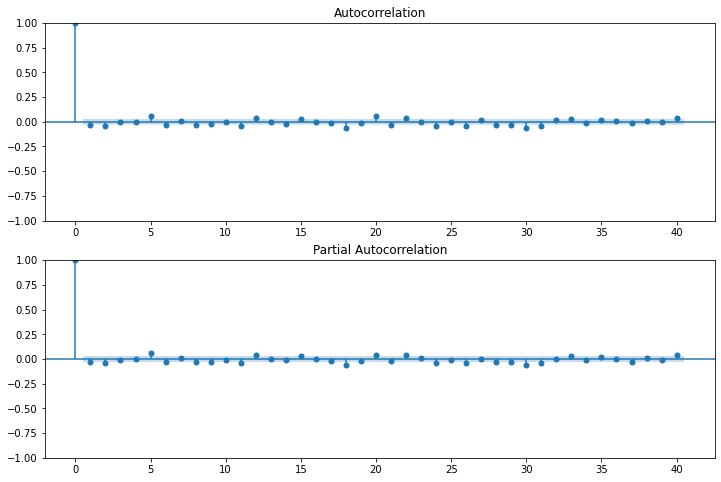

In [179]:
# plot acf pcf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['First_difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['First_difference'].iloc[1:],lags=40,ax=ax2)

In [ ]:
## we could not exactly identify the siginificant lags from the lag plots
## so we will use auto arima to search for appropriate lags p,q,d

In [180]:
stepwise_fit = auto_arima(train["Close"], m = 1, 
                          d = 1, max_d = 4, 
                          start_p = 1, max_p = 4,
                          start_q = 1, max_q = 4,
                          seasonal = False,   # arima
                          D = 0, max_D = 0,
                          start_P = 0, max_P = 0,
                          start_Q = 0, max_Q = 0, 
                          trace = True, error_action ='ignore', 
                          # we don't want to know if an order does not work 
                          suppress_warnings = True, 
                          # we don't want convergence warnings
                          information_criterion='aic',
                          stepwise = True)# set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21490.886, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21493.993, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21490.715, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21490.461, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21498.249, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21490.118, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21486.424, Time=3.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21454.390, Time=9.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21486.147, Time=3.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=21487.591, Time=9.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=21456.237, Time=11.86 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=21488.178, Time=4.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=21487.785, Time=5.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=21453.850, Time=13.88 sec
 ARIMA(4,1,3)(0,0

In [ ]:
# Auto arima has suggested with p=4,d=1,q=2 (least AIF) (4significant lags in AR , 1 differencing ,2 significantlags in MA)

In [209]:
order = (4, 1, 2)

arima_model = ARIMA(train["Close"], order=order).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4599
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -10717.884
Date:                Wed, 08 Feb 2023   AIC                          21449.767
Time:                        17:27:39   BIC                          21494.801
Sample:                             0   HQIC                         21465.618
                               - 4599                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5488      0.014   -112.757      0.000      -1.576      -1.522
ar.L2         -0.9824      0.017    -58.943      0.000      -1.015      -0.950
ar.L3         -0.0791      0.012     -6.661      0.000      -0.102      -0.056
ar.L4         -0.0564      0.007     -8.021      0.000      -0.070      -0.043
ma.L1          1.5242      0.012    123.394      0.000       1.500       1.548
ma.L2          0.9191      0.012     78.433      0.000       0.896       0.942
sigma2         6.1970      0.044    140.035      0.000       6.110       6.284
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             54885.14
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              14.62   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [216]:
# Train prediction
train['predicted'] = list(arima_model.predict(start=0, end=len(train)-1))
mean_absolute_percentage_error(train["Close"],train['predicted']) 

0.01421206301446101

In [217]:
# Test prediction
test['predicted'] = list(arima_model.predict(start=0, end=len(test)-1))
mean_absolute_percentage_error(test["Close"],test['predicted']) 
# there might be some error with the calculation need to be tried again 

0.985968397110802

In [ ]:
# from the results the test is very poor with arima model compared to other models
# Grid search could be tried to identify the best parameters and improve the model performance

## Conclusion:

* <b> Out of all the suggested three models based on the nature of dataset (drift model,double exponential and arima) Double exponential perfromed the best with 0.02% of error in 6month stock closing price prediction.